<table width = 400 align="left" style="font-size:20px">
<tr>
    <td style="text-align:left"><b>Name:</b></td>
    <td style="text-align:left">Christian Craft</td>
</tr>
<tr>
    <td style="text-align:left"><b>Email:</b></td>
    <td style="text-align:left">cacf89@umsystem.edu</td> 
</tr>
<tr>
    <td style="text-align:left"><b>Course:</b></td>
    <td style="text-align:left">CS 5402</td>
</tr>
<tr>
    <td style="text-align:left"><b>Assignment:</b></td>
    <td style="text-align:left">Semester Project</td>
</tr>
<tr>
    <td style="text-align:left"><b>Date:</b></td>
    <td style="text-align:left">5/4/22</td>
</tr>
</table>

## Link to Git Repository:

https://git-classes.mst.edu/cacf89/data-mining-semester-project

In [2]:
# Imported for data management (dataframes)
import pandas as pd

## Concept Description:

The goal of this project is to recommend a given steam game to the user by taking the title of a game as input and outputting a list of games that they might also like. To do this we will be using K-Nearest Neighbors, K-Means Clustering, and collaborative filtering. I believe that K-Nearest neighbors will be most effective, but collaborative filtering will be used in conjunction with both to further narrow the suggestion pool.

## Data Collection:

My original plan for this project was to use SteamDB to provide a dataset, but their database is not publicly available. Instead, I searched for a complete list of steam games and their tags and found one on Kaggle.

## Example Description:

Much of the data in the file is not necessary. For our purposes we will be dropping anything that isn't an app, so first we will drop anything in the dataset which has a "type" other than "app". Next drop the url, description snippet, release date, developer, publisher, languages, achievenemnts, description, mature content warning, minimum and recommended requirements, original price, and discount price.

These are our remaining attributes:

<b>Name</b> Nominal

<b>Recent Reviews</b> Ordinal

<b>All Reviews</b> Ordinal

<b>Popular Tags</b> Nominal

<b>Genre</b> Nominal

<b>Game Details</b> Nominal


## Data Import and Wrangling:

The code below puts the data provided in the form of a comma separated value file (csv) into a dataframe and displays it.

In [3]:
df_games = pd.read_csv("../src-data/steam_games.csv", encoding = "ISO-8859-1")
df_games

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,app,RocksmithÂ® 2014 Edition â Remastered â Sa...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7,

In [4]:
# Now to drop the irrelevant data
df_games = df_games.drop(['url','desc_snippet','release_date','developer',
               'publisher','languages','achievements','game_description',
               'mature_content','minimum_requirements','recommended_requirements',
              'original_price','discount_price'], axis=1)
df_games

,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...",Action
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer"
2,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy"
3,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer"
4,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,..."
...,...,...,...,...,...,...,...
40828,app,RocksmithÂ® 2014 Edition â Remastered â Sa...,NaN,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40829,app,RocksmithÂ® 2014 Edition â Remastered â St...,NaN,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40830,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...","Indie,RPG,Strategy"
40831,app,Mega Man X5 Sound Collection,NaN,NaN,Action,"Single-player,Downloadable Content,Steam Achie...",Action


In [5]:
#filter to only apps
apps = df_games['types'] == "app"
df_games = df_games[apps]

df_games

,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...",Action
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer"
2,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy"
3,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer"
4,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,..."
...,...,...,...,...,...,...,...
40828,app,RocksmithÂ® 2014 Edition â Remastered â Sa...,NaN,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40829,app,RocksmithÂ® 2014 Edition â Remastered â St...,NaN,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","Casual,Simulation"
40830,app,Fantasy Grounds - Quests of Doom 4: A Midnight...,NaN,NaN,"RPG,Indie,Strategy,Software,Turn-Based,Fantasy...","Multi-player,Co-op,Cross-Platform Multiplayer,...","Indie,RPG,Strategy"
40831,app,Mega Man X5 Sound Collection,NaN,NaN,Action,"Single-player,Downloadable Content,Steam Achie...",Action


In [6]:
# due to the sheer volume of abandonware, asset flips, and student projects there are on steam
# any games without reviews are dropped

df_games = df_games.dropna()
df_games


,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...",Action
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer"
2,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy"
3,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer"
4,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,..."
...,...,...,...,...,...,...,...
34570,app,eSports Legend / çµç«ä¼ å¥,"Very Positive,(12),- 83% of the 12 user review...","Mixed,(593),- 62% of the 593 user reviews for ...","Indie,Strategy,Simulation,Casual,Management,e-...","Single-player,Steam Achievements,Steam Cloud","Casual,Indie,Simulation,Strategy"
35297,app,KARAKARA,"Very Positive,(19),- 94% of the 19 user review...","Overwhelmingly Positive,(789),- 96% of the 789...","Visual Novel,Anime,Sexual Content,Nudity,Cute,...","Single-player,Steam Achievements,Steam Trading...","Casual,Indie"
38390,app,Moto Racer 4,"Mixed,(19),- 42% of the 19 user reviews in the...","Mixed,(83),- 59% of the 83 user reviews for th...","Racing,Sports,Action,Multiplayer,Offroad,Arcad...","Single-player,Online Multi-Player,Shared/Split...",Racing
39715,app,Estranged: Act II,"Very Positive,(35),- 80% of the 35 user review...","Very Positive,(711),- 80% of the 711 user revi...","Early Access,Early Access,Adventure,Action,Ind...","Single-player,Full controller support","Action,Adventure,Casual,Indie,Early Access"


## Exploratory Data Analysis:

From here we can assume that games fall into separate clusters based upon genre and tags. Different tags and genres will need to be given different weights in the model. Action, Adventure, and Indie are broad genres, and thus will need to be given less significance than more specific tags such as FPS, Puzzle, Racing, or Visual Novel.

To determine which genres and tags should be given more or less weight, we first generate a word cloud for tags and one for genre. From these an estimate of which should be given less weight can be determined.

In [7]:
# Imported to create word clouds
from wordcloud import WordCloud

# Imported to allow for the display of word clouds
import matplotlib.pyplot as plt


In [8]:
# Convert all Text attribute values to text strings.
str_tags = ''.join(list(df_games['popular_tags']))

# Replace any Na values with a blank text string.
str_genres = ''.join(list(df_games['genre'].fillna('')))

In [9]:
wordcloud_tags = WordCloud().generate(str_tags)
wordcloud_genre = WordCloud().generate(str_genres)

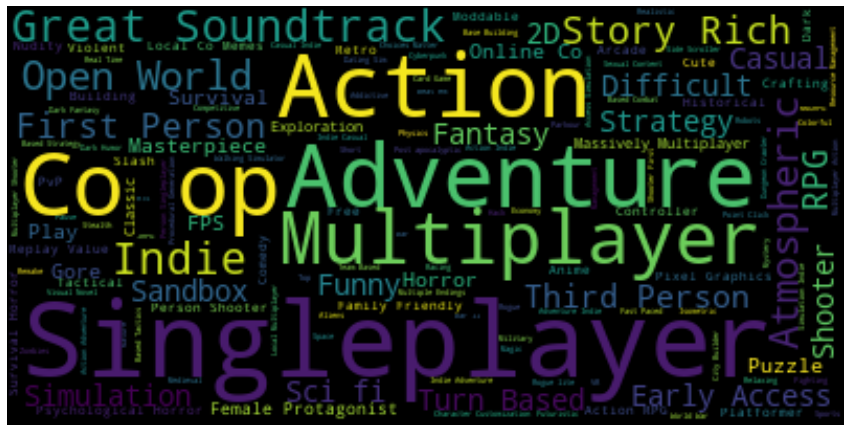

In [10]:
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_tags, interpolation='bilinear')

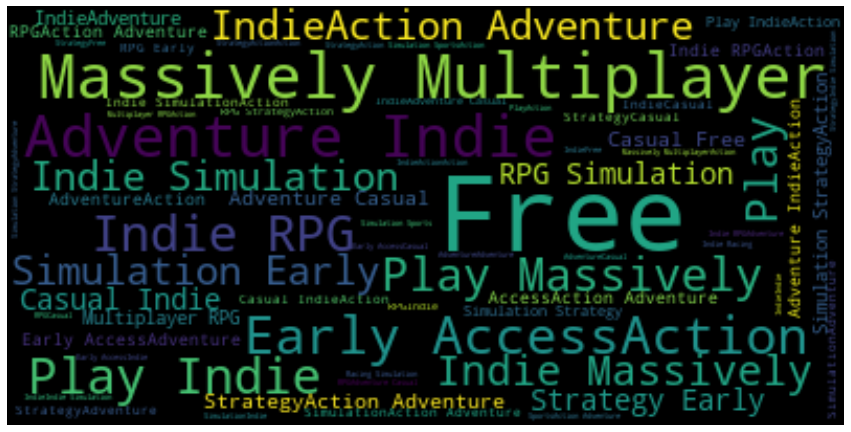

In [11]:
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_genre, interpolation='bilinear')

It seems that the most common tags are basic descriptors such as "Singlplayer, Action, Adventure, Co-op, Story Rich, Indie, Multiplayer, Atmospheric, Great Soundtrack" Basic things that can cast a broad net over many different games. The same is true for Genre. The most common Genres are "Free, Massively Multiplayer, Indie, RPG, Action, and Adventure". Genre seems to be more focused on specific terms, whereas tags can have a large variety of words. Genre is set by developers whereas tags are set by users. This is good because the users can use tags to more accurately represent their experience, but the drawback is that many games are intentionally given misleading tags by users as a joke. This is uncommon but something to consider. With this newfound information, I have decided to do each mining technique twice, once for Tags and once for Genre.

As an additional note, the tag "psychological horror" will be given reduced weight, due to the Steam community using it as a joke* for childrens games, software, low effort cash grabs, or adult content. 

*cited in references

Lastly we split the tags and genre columns by tag and genres into lists for ease of use, and we convert the reviews into floats

In [12]:
df_games['popular_tags'] = df_games.popular_tags.str.split(pat = ',', expand=False)

df_games

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","[FPS, Gore, Action, Demons, Shooter, First-Per...","Single-player,Multi-player,Co-op,Steam Achieve...",Action
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","[Survival, Shooter, Multiplayer, Battle Royale...","Multi-player,Online Multi-Player,Stats","Action,Adventure,Massively Multiplayer"
2,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","Single-player,Multi-player,Online Multi-Player...","Action,Adventure,Strategy"
3,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","[Survival, Zombies, Open World, Multiplayer, P...","Multi-player,Online Multi-Player,Steam Worksho...","Action,Adventure,Massively Multiplayer"
4,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","[Space, Massively Multiplayer, Sci-fi, Sandbox...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","Action,Free to Play,Massively Multiplayer,RPG,..."
...,...,...,...,...,...,...,...
34570,app,eSports Legend / çµç«ä¼ å¥,"Very Positive,(12),- 83% of the 12 user review...","Mixed,(593),- 62% of the 593 user reviews for ...","[Indie, Strategy, Simulation, Casual, Manageme...","Single-player,Steam Achievements,Steam Cloud","Casual,Indie,Simulation,Strategy"
35297,app,KARAKARA,"Very Positive,(19),- 94% of the 19 user review...","Overwhelmingly Positive,(789),- 96% of the 789...","[Visual Novel, Anime, Sexual Content, Nudity, ...","Single-player,Steam Achievements,Steam Trading...","Casual,Indie"
38390,app,Moto Racer 4,"Mixed,(19),- 42% of the 19 user reviews in the...","Mixed,(83),- 59% of the 83 user reviews for th...","[Racing, Sports, Action, Multiplayer, Offroad,...","Single-player,Online Multi-Player,Shared/Split...",Racing
39715,app,Estranged: Act II,"Very Positive,(35),- 80% of the 35 user review...","Very Positive,(711),- 80% of the 711 user revi...","[Early Access, Early Access, Adventure, Action...","Single-player,Full controller support","Action,Adventure,Casual,Indie,Early Access"


In [13]:
df_games['genre'] = df_games.genre.str.split(pat = ',', expand=False)

df_games

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","[FPS, Gore, Action, Demons, Shooter, First-Per...","Single-player,Multi-player,Co-op,Steam Achieve...",[Action]
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","[Survival, Shooter, Multiplayer, Battle Royale...","Multi-player,Online Multi-Player,Stats","[Action, Adventure, Massively Multiplayer]"
2,app,BATTLETECH,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","Single-player,Multi-player,Online Multi-Player...","[Action, Adventure, Strategy]"
3,app,DayZ,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","[Survival, Zombies, Open World, Multiplayer, P...","Multi-player,Online Multi-Player,Steam Worksho...","[Action, Adventure, Massively Multiplayer]"
4,app,EVE Online,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","[Space, Massively Multiplayer, Sci-fi, Sandbox...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","[Action, Free to Play, Massively Multiplayer, ..."
...,...,...,...,...,...,...,...
34570,app,eSports Legend / çµç«ä¼ å¥,"Very Positive,(12),- 83% of the 12 user review...","Mixed,(593),- 62% of the 593 user reviews for ...","[Indie, Strategy, Simulation, Casual, Manageme...","Single-player,Steam Achievements,Steam Cloud","[Casual, Indie, Simulation, Strategy]"
35297,app,KARAKARA,"Very Positive,(19),- 94% of the 19 user review...","Overwhelmingly Positive,(789),- 96% of the 789...","[Visual Novel, Anime, Sexual Content, Nudity, ...","Single-player,Steam Achievements,Steam Trading...","[Casual, Indie]"
38390,app,Moto Racer 4,"Mixed,(19),- 42% of the 19 user reviews in the...","Mixed,(83),- 59% of the 83 user reviews for th...","[Racing, Sports, Action, Multiplayer, Offroad,...","Single-player,Online Multi-Player,Shared/Split...",[Racing]
39715,app,Estranged: Act II,"Very Positive,(35),- 80% of the 35 user review...","Very Positive,(711),- 80% of the 711 user revi...","[Early Access, Early Access, Adventure, Action...","Single-player,Full controller support","[Action, Adventure, Casual, Indie, Early Access]"


In [14]:
df_games['recent_reviews'] = df_games.recent_reviews.str.extract(r'(\d{1,3}[%])')
df_games['recent_reviews'] = df_games.recent_reviews.str.extract(r'(\d{1,3})').astype(float)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_games['all_reviews'] = df_games.all_reviews.str.extract(r'(\d{1,3}[%])')
df_games['all_reviews'] = df_games.all_reviews.str.extract(r'(\d{1,3})').astype(float)
df_games

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,types,name,recent_reviews,all_reviews,popular_tags,game_details,genre
0,app,DOOM,89.0,92.0,"[FPS, Gore, Action, Demons, Shooter, First-Per...","Single-player,Multi-player,Co-op,Steam Achieve...",[Action]
1,app,PLAYERUNKNOWN'S BATTLEGROUNDS,49.0,49.0,"[Survival, Shooter, Multiplayer, Battle Royale...","Multi-player,Online Multi-Player,Stats","[Action, Adventure, Massively Multiplayer]"
2,app,BATTLETECH,54.0,71.0,"[Mechs, Strategy, Turn-Based, Turn-Based Tacti...","Single-player,Multi-player,Online Multi-Player...","[Action, Adventure, Strategy]"
3,app,DayZ,57.0,61.0,"[Survival, Zombies, Open World, Multiplayer, P...","Multi-player,Online Multi-Player,Steam Worksho...","[Action, Adventure, Massively Multiplayer]"
4,app,EVE Online,54.0,74.0,"[Space, Massively Multiplayer, Sci-fi, Sandbox...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","[Action, Free to Play, Massively Multiplayer, ..."
...,...,...,...,...,...,...,...
34570,app,eSports Legend / çµç«ä¼ å¥,83.0,62.0,"[Indie, Strategy, Simulation, Casual, Manageme...","Single-player,Steam Achievements,Steam Cloud","[Casual, Indie, Simulation, Strategy]"
35297,app,KARAKARA,94.0,96.0,"[Visual Novel, Anime, Sexual Content, Nudity, ...","Single-player,Steam Achievements,Steam Trading...","[Casual, Indie]"
38390,app,Moto Racer 4,42.0,59.0,"[Racing, Sports, Action, Multiplayer, Offroad,...","Single-player,Online Multi-Player,Shared/Split...",[Racing]
39715,app,Estranged: Act II,80.0,80.0,"[Early Access, Early Access, Adventure, Action...","Single-player,Full controller support","[Action, Adventure, Casual, Indie, Early Access]"


## Mining or Analytics:

In [16]:
#This is our distance function, it takes the list of tags or genres and returns a percent difference
def distance(tagList_a, tagList_b):
    similarity = 0
    adjust = max(len(tagList_a), len(tagList_b))
    for x in tagList_a:
        for y in tagList_b:
            if x == y:
                similarity += 1
    return 1-similarity/adjust

#now to test this on two known games, PUBG and DOOM
print(df_games['name'].at[0])
print(df_games['name'].at[1])
print(distance(df_games['popular_tags'].at[0], df_games['popular_tags'].at[1]))
print(distance(df_games['genre'].at[0], df_games['genre'].at[1]))

DOOM
PLAYERUNKNOWN'S BATTLEGROUNDS
0.65
0.6666666666666667


Our distance function indicates that DOOM, a first person arena shooter, and PUBG, a tactical battle royale shooter, are not very similar. They share the FPS attribute but very little else, while many people may enjoy both, liking one does not necessarily indicate that one would like both.

For one final test, we compare DOOM and Dragonball Xenoverse 2. Two completely different games.

In [17]:
print(df_games['name'].at[1])
print(df_games['name'].at[100])
print(distance(df_games['popular_tags'].at[1], df_games['popular_tags'].at[100]))
print(distance(df_games['genre'].at[1], df_games['genre'].at[100]))

PLAYERUNKNOWN'S BATTLEGROUNDS
DRAGON BALL XENOVERSE 2
0.75
0.25


This is an excellent example of the differences between user and developer tags. The users have provided a vast array of tags to describe a game. According to user tags, these games are 75% different, but the developers have chosen generic tags which tell very little about the game. As a result, the genre tags only indicate a 25% difference between these games.

## K-Nearest Neighbors:

First we will use K-Nearest Neighbors to put games into different "bins" similar games will be in the same "bin" and entering a game will return the games in that "bin" as a list of games that someone who played that game might like. Our distance function will be determined by how many tags a game shares with the sample game.

In [18]:
#first we isolate the index of the game with the given title
def recommend_by_tag(game_title):
    
    chosen_index = df_games[df_games['name'] == game_title].index.values

    #then we extract the tags
    chosen_tags = df_games.loc[chosen_index,'popular_tags'].values[0]

    #run them through the distance function from earlier
    tag_similarity = df_games['popular_tags'].apply(lambda row: distance(row, chosen_tags))
    
    #and finally generate a new dataframe with only the percent difference of each game in ascending order
    df_tag_distance = pd.DataFrame(data={'dist': tag_similarity, 'name' : df_games['name']})
    df_tag_distance.sort_values('dist', inplace=True)
    
    return(df_tag_distance)

#for a test run we have selected DOOM, as it has 19 user defined tags and will give the best results
similar_tags_KNN = recommend_by_tag('Yoku\'s Island Express')
similar_tags_KNN

,dist,name
372,0.00,Stardew Valley
1562,0.25,Yonder: The Cloud Catcher Chronicles
743,0.35,Garden Paws
4593,0.35,Plantera
262,0.35,Forager
...,...,...
3342,1.00,KumaKuma Manga Editor
8966,1.00,Half-Life 2: Year Long Alarm
9449,1.00,Deathgarden: BLOODHARVEST - Terminator Set
1232,1.00,HALF DEAD 2


In [19]:
#next we take the top 100 games from the list and return a new data frame with the titles of those games
similar_tags_KNN[1:100]

,dist,name
1562,0.25,Yonder: The Cloud Catcher Chronicles
743,0.35,Garden Paws
4593,0.35,Plantera
262,0.35,Forager
1193,0.40,Staxel
...,...,...
1376,0.55,To the Moon
1470,0.55,Reassembly
2674,0.55,Grow Home
2411,0.55,å¤ªå¾ç»å· The Scroll Of Taiwu


In [20]:
#now we do the same as above but for the genres
def recommend_by_genre(game_title):
    
    chosen_index = df_games[df_games['name'] == game_title].index.values

    #then we extract the tags
    chosen_genres = df_games.loc[chosen_index,'genre'].values[0]

    #run them through the distance function from earlier
    genre_similarity = df_games['genre'].apply(lambda row: distance(row, chosen_genres))
    
    #and finally generate a new dataframe with only the percent difference of each game in ascending order
    df_genre_distance = pd.DataFrame(data={'dist': genre_similarity, 'name' : df_games['name']})
    df_genre_distance.sort_values('dist', inplace=True)
    
    return(df_genre_distance)

similar_genres_KNN = recommend_by_genre('DOOM')
similar_genres_KNN

,dist,name
0,0.0,DOOM
1971,0.0,Metro Exodus
1983,0.0,Unreal Tournament 2004: Editor's Choice Edition
378,0.0,MONSTER HUNTER: WORLD
1996,0.0,QUAKE
...,...,...
331,1.0,Raft
332,1.0,Factorio
2282,1.0,IL-2 Sturmovik: 1946
2322,1.0,City Car Driving


In [21]:
#next we take the top 100 games from the list and return a new data frame with the titles of those games
#due to the lack of genre tag variety, the list has been expanded until less than 100% similarity is found
similar_genres_KNN[1:254]

,dist,name
1971,0.0,Metro Exodus
1983,0.0,Unreal Tournament 2004: Editor's Choice Edition
378,0.0,MONSTER HUNTER: WORLD
1996,0.0,QUAKE
2017,0.0,Half-Life 2: Episode One
...,...,...
4139,0.0,Deus Ex: Invisible War
4276,0.0,Dead Rising 3 Apocalypse Edition
3698,0.0,Sniper Elite: Nazi Zombie Army
215,0.0,Call of Duty: World at War


## K-Means Clustering:

Now we will try to make a model using K-Means Clustering. 

In [22]:
#ha ha, nope, don't have the time

## Collaborative filtering:

Finally we use the review score for each of the "bins" generated in KNN and K-Means to filter out games that have low reviews and try to recommend games in that "bin" that the most players enjoyed. This will pull the already generated results from KNN and K-Means and scale the results based upon the user scores on the steam store.

In [23]:
#first we create an adjusted distance by inverting the distance, and multiplying it by the review score
adjusted_dist = df_games['all_reviews']*(1-similar_tags_KNN['dist'])
#then we convert that into a percentage and complement it
adjusted_dist = 1-(adjusted_dist/100)

#finally we can put that into a dataframe and determine the most similar games to DOOM
collaborative_filter_KNN = pd.DataFrame(data={'adjusted dist' : adjusted_dist, 'name' : df_games['name']})
collaborative_filter_KNN.sort_values('adjusted dist', inplace=True)
collaborative_filter_KNN[1:100]

,adjusted dist,name
1562,0.3925,Yonder: The Cloud Catcher Chronicles
262,0.4345,Forager
743,0.4345,Garden Paws
4593,0.4345,Plantera
303,0.4600,Starbound
...,...,...
854,0.6240,Equilinox
14,0.6250,Stonehearth
61,0.6250,Graveyard Keeper
816,0.6280,Plague Inc: Evolved


## Evaluation:

## K-Nearest Neighbors:

The KNN algorithm seems to perform excellently with regards to the user defined tags. The distance formula I devised was very capable of determining games that would be similar to a specific game based upon the user given tags. The issue came with the genre tags. Due to the lack of variety and overwhelming size of the data set, the genres set by the developers were borderline useless for the algorithm. DOOM showed 100% similarity to over 250 games. This is due to the generic descriptions of the genre tags. "Action" is the only descriptor the devs have provided for this game and it simply does not suffice.

## K-Means Clustering:



## Collaborative Filtering:

Collaberative filtering was remarkably easy to implement, and provided a noticeable difference in the results, while some dissimilar games may have slipped through the cracks, I feel that nearly every game listed in the top 100 similar games was a very easy recommendation to anyone who liked DOOM.

## Results:

KNN was a very effective form of classifying and recommending games. I found it interesting how dramatically more effective the user tags were at identifying games that would be similar than the genre tags. Regardless of the user tags being used as jokes, they were still noticably better than the tags given by the developers.

## References:

<b>SteamDB (not used)</b>

https://steamdb.info/

<b>Kaggle page for source data</b>

https://www.kaggle.com/datasets/trolukovich/steam-games-complete-dataset?select=steam_games.csv

<b>Links to various games currently incorrectly categorized in "Psychological Horror" tab</b>

https://store.steampowered.com/app/920210/LEGO_Star_Wars_The_Skywalker_Saga/

https://store.steampowered.com/app/1714040/Super_Auto_Pets/

https://store.steampowered.com/app/1454400/Cookie_Clicker/

You get the idea, this is very likely to be outdated within a few months

<b>df.series.str.extract()</b>

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html

<b>df.series.str.split()</b>

https://www.delftstack.com/howto/python-pandas/split-column-in-python-pandas/#:~:text=We%20can%20use%20the%20pandas,to%20the%20entire%20Dataframe%20column.

<b>df.apply()</b>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

<b>df.where()</b>

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

<b>Collaborative Filtering:</b>

https://realpython.com/build-recommendation-engine-collaborative-filtering/#:~:text=Collaborative%20filtering%20is%20a%20technique,similar%20to%20a%20particular%20user.

